In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np
import tensorflow as tf
import tensorflow.keras as keras

In [10]:
# Data Preparation
data = np.genfromtxt('iris_full.csv', 
                     delimiter=',', 
                     skip_header=1)
X = data[:,0:4]
y = data[:,4:]

In [4]:
# create model
model = tf.keras.Sequential()
model.add(tf.keras.Input(shape=(4,)))
model.add(tf.keras.layers.Dense(units=3, activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 3)                 15        
                                                                 
Total params: 15
Trainable params: 15
Non-trainable params: 0
_________________________________________________________________


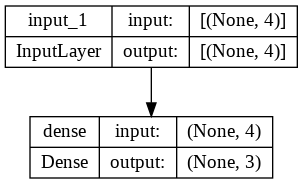

In [5]:
from tensorflow.keras.utils import plot_model
plot_model(model, to_file="/content/my_model.png", show_shapes=True)

In [8]:
# metrics
opt = keras.optimizers.SGD(learning_rate=0.01)
model.compile(optimizer=opt,
              loss='sparse_categorical_crossentropy',
              metrics=[keras.metrics.SparseCategoricalAccuracy()])

# training
batch_size = 32
epochs = 5
history = model.fit(X, y, batch_size, epochs=epochs)

Epoch 1/5
5/5 [==============================] - 1s 3ms/step - loss: 5.4755 - sparse_categorical_accuracy: 0.6667
Epoch 2/5
5/5 [==============================] - 0s 3ms/step - loss: 4.9248 - sparse_categorical_accuracy: 0.6667
Epoch 3/5
5/5 [==============================] - 0s 3ms/step - loss: 4.3809 - sparse_categorical_accuracy: 0.6667
Epoch 4/5
5/5 [==============================] - 0s 3ms/step - loss: 3.8358 - sparse_categorical_accuracy: 0.6667
Epoch 5/5
5/5 [==============================] - 0s 3ms/step - loss: 3.2866 - sparse_categorical_accuracy: 0.6667


In [11]:
# Initial Epochs
batch_size = 32
epochs = 10
history = model.fit(X, y, batch_size, 
                    epochs=epochs, initial_epoch=5, verbose=2)

Epoch 6/10
5/5 - 0s - loss: 2.7469 - sparse_categorical_accuracy: 0.6667 - 13ms/epoch - 3ms/step
Epoch 7/10
5/5 - 0s - loss: 2.2192 - sparse_categorical_accuracy: 0.6667 - 11ms/epoch - 2ms/step
Epoch 8/10
5/5 - 0s - loss: 1.6990 - sparse_categorical_accuracy: 0.6667 - 11ms/epoch - 2ms/step
Epoch 9/10
5/5 - 0s - loss: 1.2238 - sparse_categorical_accuracy: 0.6667 - 11ms/epoch - 2ms/step
Epoch 10/10
5/5 - 0s - loss: 0.8767 - sparse_categorical_accuracy: 0.6667 - 11ms/epoch - 2ms/step


## Training with Validation Data

### Cách 1

In [ ]:
# compile
model.compile(optimizer='sgd', 
              loss='sparse_categorical_crossentropy')

# training
batch_size = 32
epochs = 6
history = model.fit(X, y, batch_size, 
                    epochs=epochs, verbose=2,
                    validation_split=0.2)

### Cách 2

In [12]:
# Data Preparation
data = np.genfromtxt('iris_full.csv', 
                     delimiter=',', 
                     skip_header=1)
x = data[:,:4]
y = data[:,4:]
N = x.shape[0]

# shuffle
inds = np.arange(N)
np.random.shuffle(inds)

x = x[inds]
y = y[inds]

# prepare train and val data
N_train = 120
x_train = x[:N_train]
y_train = y[:N_train]

x_val = x[N_train:]
y_val = y[N_train:]


print('Train data')
print(x_train.shape)
print(y_train.shape)

print('Validation data')
print(x_val.shape)
print(y_val.shape)

Train data
(120, 4)
(120, 1)
Validation data
(30, 4)
(30, 1)


In [13]:
# create model
model = tf.keras.Sequential()
model.add(tf.keras.Input(shape=(4,)))
model.add(tf.keras.layers.Dense(units=3, activation='softmax'))

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 3)                 15        
                                                                 
Total params: 15
Trainable params: 15
Non-trainable params: 0
_________________________________________________________________


In [14]:
# compile
model.compile(optimizer='sgd', 
              loss='sparse_categorical_crossentropy')

# training
batch_size = 32
epochs = 6

# Nếu có cả validation_data và validation_split thì nó sẽ ưu tiên validation_data
history = model.fit(x_train, y_train, batch_size,
                    validation_data=(x_val, y_val),
                    validation_split=0.4,
                    epochs=epochs, verbose=2)

Epoch 1/6
4/4 - 0s - loss: 2.1672 - val_loss: 2.0602 - 399ms/epoch - 100ms/step
Epoch 2/6
4/4 - 0s - loss: 1.9316 - val_loss: 1.8560 - 29ms/epoch - 7ms/step
Epoch 3/6
4/4 - 0s - loss: 1.8242 - val_loss: 1.7374 - 27ms/epoch - 7ms/step
Epoch 4/6
4/4 - 0s - loss: 1.7555 - val_loss: 1.6607 - 28ms/epoch - 7ms/step
Epoch 5/6
4/4 - 0s - loss: 1.7036 - val_loss: 1.6011 - 29ms/epoch - 7ms/step
Epoch 6/6
4/4 - 0s - loss: 1.6504 - val_loss: 1.5603 - 25ms/epoch - 6ms/step


## Callbacks

In [15]:
# compile
model.compile(optimizer='sgd', 
              loss='sparse_categorical_crossentropy',
              metrics=[keras.metrics.SparseCategoricalAccuracy()])

# training
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="/content/models/model_{epoch}",
        save_best_only=True,
        monitor="val_loss",
        verbose=1
    )
]

batch_size = 32
epochs = 5
history = model.fit(x_train, y_train, batch_size,
                    validation_data=(x_val, y_val),
                    epochs=epochs, verbose=2,
                    callbacks=callbacks)

Epoch 1/5

Epoch 1: val_loss improved from inf to 1.51705, saving model to /content/models/model_1
4/4 - 1s - loss: 1.6046 - sparse_categorical_accuracy: 0.2167 - val_loss: 1.5171 - val_sparse_categorical_accuracy: 0.3333 - 936ms/epoch - 234ms/step
Epoch 2/5

Epoch 2: val_loss improved from 1.51705 to 1.47854, saving model to /content/models/model_2
4/4 - 0s - loss: 1.5567 - sparse_categorical_accuracy: 0.1167 - val_loss: 1.4785 - val_sparse_categorical_accuracy: 0.3333 - 340ms/epoch - 85ms/step
Epoch 3/5

Epoch 3: val_loss improved from 1.47854 to 1.42577, saving model to /content/models/model_3
4/4 - 0s - loss: 1.5093 - sparse_categorical_accuracy: 0.1833 - val_loss: 1.4258 - val_sparse_categorical_accuracy: 0.1667 - 347ms/epoch - 87ms/step
Epoch 4/5

Epoch 4: val_loss improved from 1.42577 to 1.38529, saving model to /content/models/model_4
4/4 - 0s - loss: 1.4599 - sparse_categorical_accuracy: 0.0500 - val_loss: 1.3853 - val_sparse_categorical_accuracy: 0.2000 - 367ms/epoch - 92ms/

In [17]:
# Load model
model = keras.models.load_model('/content/models/model_5')
print(model.layers[0].get_weights())
model.summary()

[array([[-0.00783871, -0.1830154 , -0.16942935],
       [-0.00624867,  0.5129375 ,  0.62652194],
       [ 0.00110918,  0.05522906,  0.10140973],
       [ 0.7136375 ,  0.4482787 ,  0.06558963]], dtype=float32), array([ 0.02842365, -0.0082521 , -0.02017156], dtype=float32)]
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 3)                 15        
                                                                 
Total params: 15
Trainable params: 15
Non-trainable params: 0
_________________________________________________________________


In [18]:
# Evaluation
model.evaluate(x_val, y_val, batch_size, verbose=2)

1/1 - 0s - loss: 1.3413 - sparse_categorical_accuracy: 0.1000 - 124ms/epoch - 124ms/step


[1.341265082359314, 0.10000000149011612]

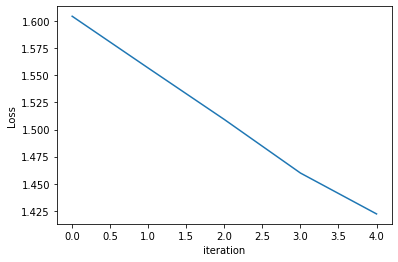

In [19]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.xlabel('iteration')
plt.ylabel('Loss')
plt.show()

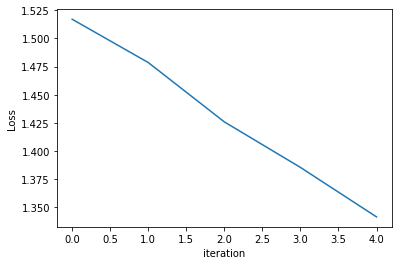

In [21]:
import matplotlib.pyplot as plt

plt.plot(history.history['val_loss'])
plt.xlabel('iteration')
plt.ylabel('Loss')
plt.show()